## **1 Regresión Logística **

### **1.1 Fundamentes de la Técnica**

La Regresión Logística es un modelo de clasificación supervisada que predice la probabilidad de que un patrón pertenezca a una clase. Aunque su nombre diga “regresión”, se usa para clasificar, no para predecir valores continuos.

Funciona aplicando una función logística (sigmoide) a una combinación lineal de las entradas.
La salida es un valor entre 0 y 1 que representa una probabilidad.


*   Si la probabilidad es mayor a 0.5 → clase 1
*   Si es menor → clase 0

A diferencia de la regresión lineal, que predice valores continuos, la regresión logística transforma su salida utilizando una función logística (Sigmoide) para acotar los resultados entre 0 y 1, lo que se interpreta como una probabilidad.



### **1.2 Modelo Matemático**

El modelo calcula primero una combinación lineal:

$$z = w⋅x+b$$

Luego aplica la función sigmoide:

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

<br>

La sigmoide convierte cualquier número en un valor entre 0 y 1.

La decisión final es:

$$
\hat{y} =
\begin{cases}
1 & \text{si } \sigma(z) \ge 0.5 \\
0 & \text{si } \sigma(z) < 0.5
\end{cases}
$$

<br>

El objetivo del modelo es encontrar los pesos `w` y el sesgo `b` que minimizan la pérdida logarítmica (log-loss):

$$
L = -\frac{1}{N} \sum \left[ y \log(\hat{y}) + (1 - y)\log(1 - \hat{y}) \right]
$$





### **1.3 Librería scikit-learn**
Para la implementación del Perceptrón se utiliza la librería scikit-learn (alias sklearn).

| Componente | Descripción |
| :--- | :--- |
| `from sklearn.linear_model import LogisticRegression` | Clase del modelo. |
| `LogisticRegression()` | Crea el modelo. |
| `fit(X, y)` | Entrena el modelo. |
| `predict(X)` | Predice la clase. |
| `predict_proba(X)` | Devuelve probabilidades. |
| `from sklearn.metrics import accuracy_score, confusion_matrix` | Métricas de evaluación. |



### **1.4 Pipeline**

**Preprocesamiento**

Para esta parte, usaremos el dataset **Iris** incluido en `scikit-learn`.
Usaremos sólamente dos clases, además de calcular estadísticas básicas como la media, la desviación estándar, el máximo y el mínimo, así como mostrar un gráfico de dispersión de los datos.


Media:
 sepal_length    5.471
sepal_width     3.099
target          0.500
dtype: float64

Desviación estándar:
 sepal_length    0.641698
sepal_width     0.478739
target          0.502519
dtype: float64

Mínimos:
 sepal_length    4.3
sepal_width     2.0
target          0.0
dtype: float64

Máximos:
 sepal_length    7.0
sepal_width     4.4
target          1.0
dtype: float64


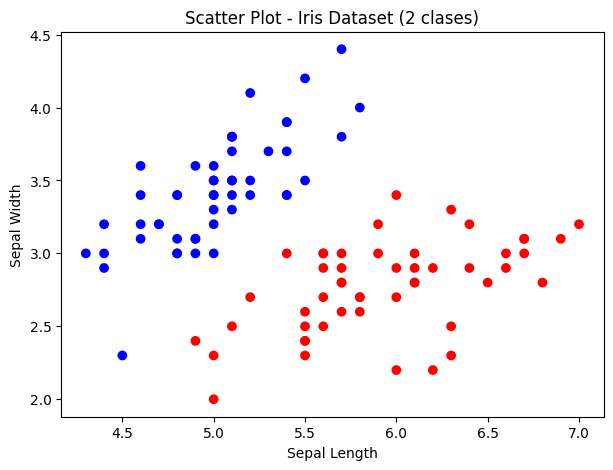

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Cargar dataset
iris = load_iris()
X = iris.data[:, :2]  # Solo 2 features para scatter plot
y = iris.target

# Convertir a DataFrame para estadísticas
df = pd.DataFrame(X, columns=["sepal_length", "sepal_width"])
df["target"] = y

# Filtrar solo 2 clases para clasificación binaria (0 y 1)
df = df[df["target"] != 2]

X = df[["sepal_length", "sepal_width"]].values
y = df["target"].values

# Estadísticos
print("Media:\n", df.mean())
print("\nDesviación estándar:\n", df.std())
print("\nMínimos:\n", df.min())
print("\nMáximos:\n", df.max())

# Scatter plot
plt.figure(figsize=(7, 5))
plt.scatter(df["sepal_length"], df["sepal_width"], c=y, cmap="bwr")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Scatter Plot - Iris Dataset (2 clases)")
plt.show()

  **Predicción**

  Crearemos una función que reciba un vector de entrada y regrese la clase predicha.

In [8]:
from sklearn.linear_model import LogisticRegression

# Entrenar modelo
model = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=100)
model.fit(X, y)

# Mostrar parámetros del modelo
print("Parámetros del Modelo Matemático")
print(f"Pesos (w): {model.coef_}")
print(f"Sesgo (b): {model.intercept_}\n")

# Función para predecir un patrón
def clasificar(patron):
    pred = model.predict([patron])[0]
    prob = model.predict_proba([patron])[0]
    print(f"Para el patrón {patron}:")
    print(f" -> Clase predicha: {pred}")
    print(f" -> Probabilidad: {prob}\n")

# Ejemplo
clasificar([5.0, 3.5])

Parámetros del Modelo Matemático
Pesos (w): [[ 3.08267284 -3.01867739]]
Sesgo (b): [-7.33819169]

Para el patrón [5.0, 3.5]:
 -> Clase predicha: 0
 -> Probabilidad: [0.92345182 0.07654818]



  **Evaluación del Modelo**

 Evaluaremos qué tan bien funcionó el modelo usando:

*   Matriz de confusión
*   Accuracy



In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = model.predict(X)

# Matriz de confusión
cm = confusion_matrix(y, y_pred)
print("Matriz de Confusión:\n", cm)

# Accuracy
acc = accuracy_score(y, y_pred)
print("\nAccuracy:", acc)

Matriz de Confusión:
 [[50  0]
 [ 0 50]]

Accuracy: 1.0


### **1.5 Fuentes Bibliográficas**

IBM. (s.f.). **¿Qué es la regresión logística?** | IBM. https://www.ibm.com/mx-es/think/topics/logistic-regression

Regresión logística con Python. (s.f.). **Ciencia de datos, teoría y ejemplos prácticos en R y Python.** https://cienciadedatos.net/documentos/py17-regresion-logistica-python

**Scikit-learn documentation.** (s.f.). scikit-learn. https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

Hecho por **Luis Angel De La Cruz Ascencio**